In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# EDA. ("Exploratory Data Analysis" )

### Indice:

###   (0). Previos ( creación de los dataframes con los tres archivos.parquet)
###   (1). Concatenación, primera versión antes del EDA para el desarrollo de la función  (def PlayTimeGenre)
###   (2). EDA para el desarrollo de la función  (def PlayTimeGenre)
###   (3). Testing función (def PlayTimeGenre)
###   (4). Concatenación primera versión antes del EDA para el desarrollo de la función (def UserForGenre)
###   (5). EDA para el desarrollo de la función  (def UserForGenre)
###   (6). Testing función (UserForGenre).
###   (7). Concatenación primera versión antes del EDA para el desarrollo de la función (UsersRecommend)
###   (8). EDA para el desarrollo de la función  (UsersRecommend)
###   (9). Testing función (usersRecommend)
###   (10).Concatenación función (UsersNotRecommend.)
###   (11) .EDA para la función (UsersNotRecommend.)
###   (12). Testing función (UsersNotRecommend)
###   (13).Concatenación función (sentiment_analysis.)
###   (14) EDA (sentiment_analysis.)
###   (15)  Testing función (sentiment_analysis.)



## (0) Previos . Creación y verificación datos del dataframes df_steam_games, df_user_reviews, df_users_items


### Creo el dataframe con el archivo steam_games.parquet y verifico nuevamente los datos y su longitud

In [3]:
df_steam_games = pd.read_parquet('steam_games.parquet')
df_steam_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     21194 non-null  object        
 1   genres        21194 non-null  object        
 2   app_name      21194 non-null  object        
 3   title         21194 non-null  object        
 4   url           21194 non-null  object        
 5   release_date  21194 non-null  datetime64[ns]
 6   tags          21194 non-null  object        
 7   reviews_url   21194 non-null  object        
 8   specs         21194 non-null  object        
 9   price         21194 non-null  float64       
 10  early_access  21194 non-null  float64       
 11  id            21194 non-null  float64       
 12  developer     21194 non-null  object        
 13  num_reviews   21194 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 2.3+ MB


In [4]:
df_steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,num_reviews
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,761140.0
1,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域,767400.0
2,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd,772540.0
3,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774277/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",18.99,0.0,774277.0,Poppermost Productions,774277.0
4,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774278/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,0.0,774278.0,Poppermost Productions,774278.0


### Creo el dataframe con el archivo user_reviews.parquet y verifico nuevamente los datos y su longitud.

In [5]:
df_user_reviews = pd.read_parquet('user_reviews.parquet')
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             25771 non-null  object        
 1   user_url            25771 non-null  object        
 2   item_id             25771 non-null  int64         
 3   helpful             25771 non-null  object        
 4   recommend           25771 non-null  bool          
 5   posted_date         25771 non-null  datetime64[ns]
 6   sentiment_analysis  25771 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB


In [6]:
df_user_reviews.head()

,user_id,user_url,item_id,helpful,recommend,posted_date,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,No ratings yet,True,2011-01-01,2
1,js41637,http://steamcommunity.com/id/js41637,239030,1 of 4 people (25%) found this review helpful,True,2013-01-01,0
2,evcentric,http://steamcommunity.com/id/evcentric,224500,No ratings yet,True,2014-01-01,2
3,doctr,http://steamcommunity.com/id/doctr,108710,No ratings yet,True,2012-01-01,2
4,maplemage,http://steamcommunity.com/id/maplemage,204300,No ratings yet,True,2013-01-01,2


### Creo el dataframe con el archivo users_items.parquet y verifico nuevamente los datos y su longitud

In [7]:
df_users_items = pd.read_parquet('users_items.parquet')
df_users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88176 non-null  object 
 1   items_count       88176 non-null  float64
 2   steam_id          88176 non-null  object 
 3   user_url          88176 non-null  object 
 4   item_id           88176 non-null  int64  
 5   item_name         88176 non-null  object 
 6   playtime_forever  88176 non-null  float64
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.4+ MB


In [8]:
df_users_items.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0.0,0.0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7.0,0.0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0.0,0.0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0.0,0.0


## (1) Concatenación primera versión 
## Campos Primera función. 
## Versión antes del EDA.

### Para el desarrollo de la primera función del MVP def PlayTimeGenre( genero : str ), Considero necesario los siguientes campos:

### del dataframe df_steam_games:  (1) genres: Para identificar el género de cada juego.
### (2) release_date: Para conocer la fecha de lanzamiento de cada juego. Esto se utiliza para relacionar el año de lanzamiento con las reseñas de los usuarios.
### (3) id: Para relacionar los juegos con las reseñas de los usuarios. El campo id del df_steam_games se relaciona con item_id de df_user_reviews.


### Del DataFrame df_user_reviews: 
### (4) item_id: Para relacionar las reseñas con los juegos del género especificado.
### (5) posted_date: Para conocer la fecha en que se publicaron las reseñas.Esto es importante para calcular las horas jugadas por año.

### Del DataFrame df_users_items 
### (6) playtime_forever: Para calcular las horas jugadas por juego (expresadas en minutos). Este campo es necesario para determinar las horas jugadas en cada juego.


## Realizo la concatenación de los campos que necesito para la primera función en un nuevo dataframe

In [9]:
# Selecciono los campos requeridos para la función PlayTimeGenre
df_steam_games_subset = df_steam_games[['genres', 'release_date', 'id']]
df_user_reviews_subset = df_user_reviews[['item_id', 'posted_date']]
df_users_items_subset = df_users_items[[ 'playtime_forever']]

# Concateno los DataFrames seleccionados
df_primera_funcion = pd.concat([df_steam_games_subset, df_user_reviews_subset, df_users_items_subset], axis=1)

df_primera_funcion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   id                21194 non-null  float64       
 3   item_id           25771 non-null  float64       
 4   posted_date       25771 non-null  datetime64[ns]
 5   playtime_forever  88176 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 4.0+ MB


In [10]:
df_primera_funcion.head()

,genres,release_date,id,item_id,posted_date,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,761140.0,43110.0,2011-01-01,6.0
1,"[Action, Adventure, Casual]",2017-12-07,767400.0,239030.0,2013-01-01,0.0
2,"[Action, Adventure, Simulation]",2018-01-04,772540.0,224500.0,2014-01-01,7.0
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774277.0,108710.0,2012-01-01,0.0
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774278.0,204300.0,2013-01-01,0.0


### Elimino datos faltantes producto de las diferentes longitudes en la concatenación

In [11]:
df_primera_funcion.dropna(inplace=True)
df_primera_funcion.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   id                21194 non-null  float64       
 3   item_id           21194 non-null  float64       
 4   posted_date       21194 non-null  datetime64[ns]
 5   playtime_forever  21194 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 1.1+ MB


### Reorganizo los indices despues de eliminar los datos faltantes

In [12]:
# Reorganizo los indices despues de la eliminación de datos faltantes
df_primera_funcion.reset_index(drop=True, inplace=True)
print(df_primera_funcion.index)

RangeIndex(start=0, stop=21194, step=1)


### Verifico la cabeza y la cola del nuevo DataFrame

In [13]:
df_primera_funcion.head()

,genres,release_date,id,item_id,posted_date,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,761140.0,43110.0,2011-01-01,6.0
1,"[Action, Adventure, Casual]",2017-12-07,767400.0,239030.0,2013-01-01,0.0
2,"[Action, Adventure, Simulation]",2018-01-04,772540.0,224500.0,2014-01-01,7.0
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774277.0,108710.0,2012-01-01,0.0
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774278.0,204300.0,2013-01-01,0.0


In [14]:
df_primera_funcion.tail()

,genres,release_date,id,item_id,posted_date,playtime_forever
21189,"[Action, Adventure, Casual, Indie]",2018-01-04,745400.0,8930.0,2014-01-01,269.0
21190,"[Casual, Indie, Simulation, Strategy]",2018-01-04,773640.0,440.0,2015-01-01,0.0
21191,"[Casual, Indie, Strategy]",2018-01-04,733530.0,468410.0,2014-01-01,754.0
21192,"[Indie, Racing, Simulation]",2018-01-04,610660.0,4000.0,2015-01-01,0.0
21193,"[Casual, Indie]",2017-09-02,658870.0,730.0,2014-01-01,0.0


## (2). EDA para el desarrollo de la función  (def PlayTimeGenre)

## Realizo un resumen de estadisticas descriptivas del df_primera_funcion
### 1. Hay 21,194 entradas en las columnas.
### 2. Media: La fecha de lanzamiento promedio es el 28 de febrero de 2015 y la fecha de publicación promedio es el 14 de enero de 2014.
### 3.Media: La media de id es aproximadamente 427,193.2, la de item_id es aproximadamente 154,977.7, y la de playtime_forever es aproximadamente 1,354.1.
### 4. Valor Mínimo: La fecha de lanzamiento más temprana es el 19 de junio de 1983, y la fecha de publicación más temprana es el 1 de enero de 2010.
### 5. Valor Mínimo: El valor mínimo de id es 10, el de item_id es 10, y el de playtime_forever es 0.
### 6. Valor Máximo: La fecha de lanzamiento más reciente es el 31 de diciembre de 2021, y la fecha de publicación más reciente es el 1 de enero de 2015.
### 7. Valor Máximo: El valor máximo de id es aproximadamente 2,028,850, el de item_id es 527,340, y el de playtime_forever es 303,466.
### 8. playtime_forever tiene una desviación estándar de aproximadamente 7,628.2, lo que indica una variabilidad considerable en las horas jugadas.

In [15]:
df_primera_funcion.describe()

,release_date,id,item_id,posted_date,playtime_forever
count,21194,2.119400e+04,21194.000000,21194,21194.000000
mean,2015-02-28 09:42:20.756817920,4.271932e+05,154977.698547,2014-01-14 11:24:36.078135552,1354.077947
min,1983-06-19 00:00:00,1.000000e+01,10.000000,2010-01-01 00:00:00,0.000000
25%,2014-06-19 00:00:00,2.979650e+05,4000.000000,2014-01-01 00:00:00,0.000000
50%,2016-03-24 00:00:00,4.205600e+05,208090.000000,2014-01-01 00:00:00,45.000000
75%,2017-04-18 00:00:00,5.773750e+05,250900.000000,2015-01-01 00:00:00,389.000000
max,2021-12-31 00:00:00,2.028850e+06,527340.000000,2015-01-01 00:00:00,303466.000000
std,NaN,1.924750e+05,131324.840312,NaN,7628.226474


### Reviso el numero total de generos del campo genres y los muestro en una lista para poder identificarlos.

In [16]:
#  con explode desagrupo la columna 'genres' para que cada género se convierta en una fila única
df_exploded = df_primera_funcion.explode('genres')

# Obtengo la lista de géneros únicos
generos_unicos = df_exploded['genres'].unique()

# Cuento el total de géneros únicos
total_generos = len(generos_unicos)

print(f"Total de géneros totales: {total_generos}")

print("Géneros únicos:")
print(generos_unicos)


Total de géneros totales: 21
Géneros únicos:
['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Adventure'
 'Free to Play' 'Sports' 'RPG' 'Racing' 'Early Access'
 'Massively Multiplayer' 'Animation &amp; Modeling' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Video Production' 'Photo Editing']


### Realizo una grafica de barras para conocer su distribución para comprender mejor la información de manera grafica

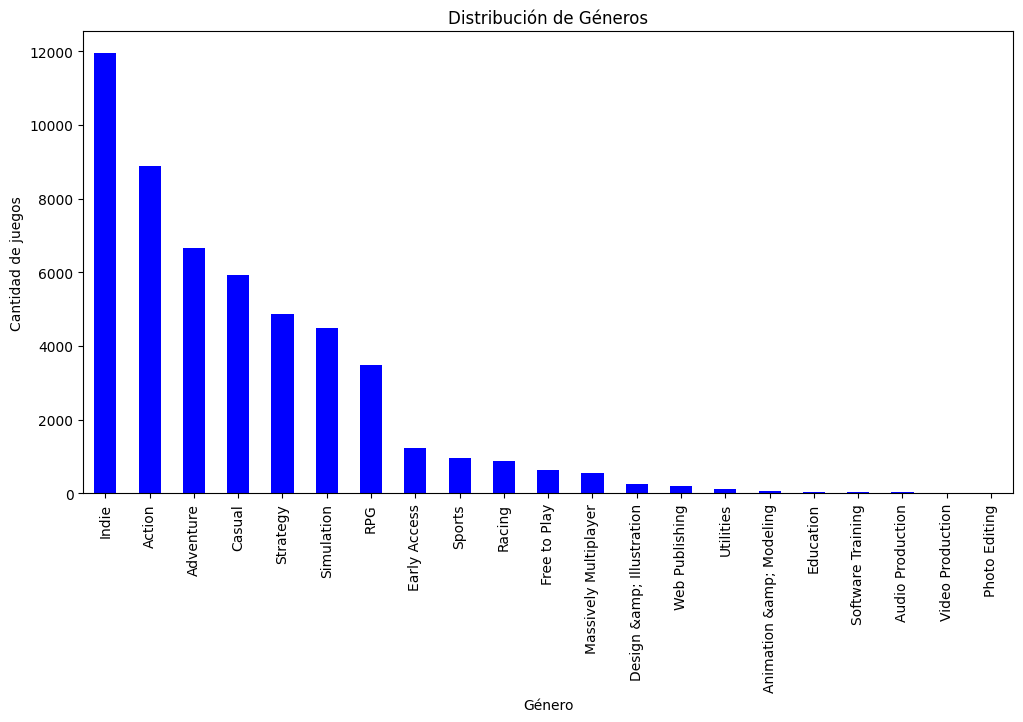

In [17]:

df_exploded = df_primera_funcion.explode('genres')

genero_counts = df_exploded['genres'].value_counts()

plt.figure(figsize=(12, 6))

genero_counts.plot(kind='bar', color='blue')

plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.title('Distribución de Géneros')

plt.xticks(rotation=90)


plt.show()


### Verifico la cantidad exacta de juegos por cada genero

In [18]:

df_exploded = df_primera_funcion.explode('genres')

genero_item_counts = df_exploded.groupby('genres')['item_id'].count()

print(genero_item_counts)


genres
Action                        8883
Adventure                     6652
Animation &amp; Modeling        79
Audio Production                29
Casual                        5929
Design &amp; Illustration      251
Early Access                  1238
Education                       50
Free to Play                   637
Indie                        11944
Massively Multiplayer          563
Photo Editing                   10
RPG                           3496
Racing                         887
Simulation                    4503
Software Training               33
Sports                         970
Strategy                      4882
Utilities                      129
Video Production                18
Web Publishing                 191
Name: item_id, dtype: int64


### Verifico el numero total de años en el campo release_date y los muestro en una lista

In [19]:
# Obténgo una lista de los años únicos en la columna 'release_date'
lista_anios = df_primera_funcion['release_date'].dt.year.unique()

# Obténgo el número total de años únicos
total_anios = len(lista_anios)


print("Lista de años:")
print(lista_anios)

print(f"Número total de años: {total_anios}")


Lista de años:
[2018 2017 1997 1998 2016 2006 2005 2003 2007 2002 2000 1995 1996 1994
 2001 1993 2004 2008 2009 1999 1992 1989 2010 2011 2012 2013 2014 1983
 1984 2015 1990 1988 1991 1987 1986 2021 2019 1985]
Número total de años: 38


### Organizo los años del mas reciente al mas antiguo.

In [20]:
# Organizo la lista de años de forma descendente (del más reciente al más antiguo)
lista_anios_ordenados = sorted(lista_anios, reverse=True)

print("Lista de años ordenada (del más reciente al más antiguo):")
print(lista_anios_ordenados)


Lista de años ordenada (del más reciente al más antiguo):
[2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983]


### Creo la grafica de distribución del campo release_date

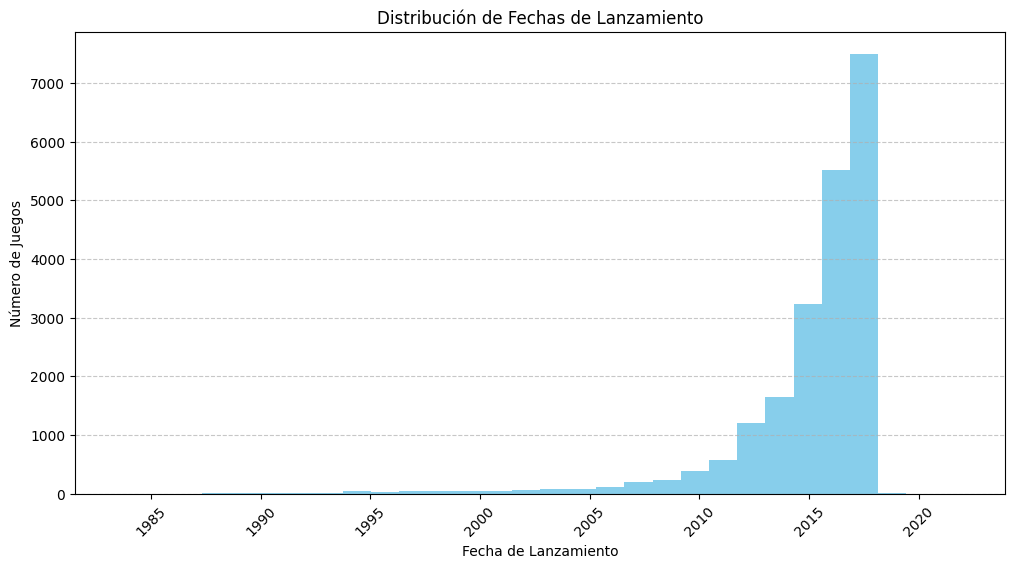

In [21]:


# Creo un histograma de las fechas de lanzamiento
plt.figure(figsize=(12, 6))
plt.hist(df_primera_funcion['release_date'], bins=30, color='skyblue')


plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Fechas de Lanzamiento')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.show()


### Verificio el numero de lanzamientos por año

In [22]:


# Agrupo por año y cuento el número de lanzamientos por año
lanzamientos_por_año = df_primera_funcion.groupby('release_date').size().reset_index() # creo un dataframe para mostrar la información

# Renombro las columnas del DataFrame resultante
lanzamientos_por_año.columns = ['Año de Lanzamiento', 'Número de Lanzamientos']


lanzamientos_por_año


,Año de Lanzamiento,Número de Lanzamientos
0,1983-06-19,1
1,1984-04-29,1
2,1984-11-01,1
3,1985-01-01,1
4,1986-05-01,1
...,...,...
3115,2018-12-01,2
3116,2018-12-20,1
3117,2018-12-31,1
3118,2019-12-10,1


### Genero el grafico para la distribución del campo posted_date

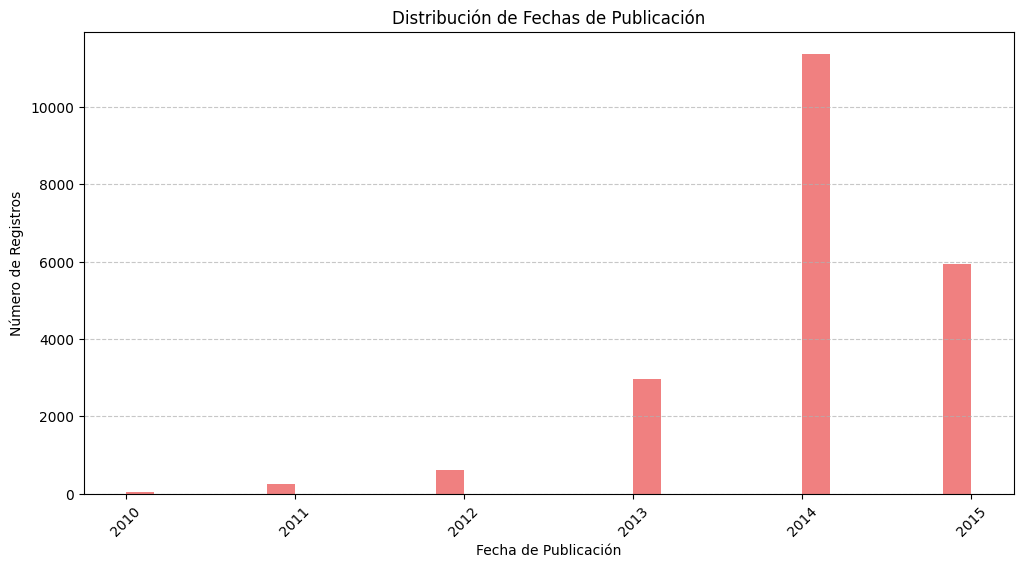

In [23]:

plt.figure(figsize=(12, 6))
plt.hist(df_primera_funcion['posted_date'], bins=30, color='lightcoral')

plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Registros')
plt.title('Distribución de Fechas de Publicación')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)


plt.show()


### Muestro el numero de publicaciones por año.
### Se observa que del año 2010 al año 2015 existen publicaciones, en relacion al campo posted_date

In [24]:
# filtro el año de la columna 'posted_date' y creo una nueva columna 'año_publicacion'
df_primera_funcion['año_publicacion'] = df_primera_funcion['posted_date'].dt.year

# cuento el número total de publicaciones por año
publicaciones_por_año = df_primera_funcion['año_publicacion'].value_counts().sort_index().reset_index()

# Renombro las columnas del DataFrame resultante
publicaciones_por_año.columns = ['Año de Publicación', 'Número de Publicaciones']

print(publicaciones_por_año)


   Año de Publicación  Número de Publicaciones
0                2010                       44
1                2011                      262
2                2012                      621
3                2013                     2957
4                2014                    11364
5                2015                     5946


### Muestro el numero de minutos jugados por año de lanzamiento en un dataframe.

In [25]:


# Agrupo por año de lanzamiento y sumo el tiempo de juego en minutos
minutos_por_año = df_primera_funcion.groupby(df_primera_funcion['release_date'].dt.year)['playtime_forever'].sum().reset_index()

# Renombro las columnas
minutos_por_año.columns = ['Año de Lanzamiento', 'Minutos Totales de juego']


minutos_por_año


,Año de Lanzamiento,Minutos Totales de juego
0,1983,1381.0
1,1984,0.0
2,1985,0.0
3,1986,0.0
4,1987,869.0
5,1988,6081.0
6,1989,52400.0
7,1990,1328.0
8,1991,1156.0
9,1992,17026.0


### Muestro en un dataframe el año de lanzamiento y los minutos jugados por cada genero.
### esto sirve para verificar y comparar si la función def PlayTimeGenre arroja un resultado verdadero 

In [26]:


# Expando las listas de géneros en nuevas filas duplicando los demás valores
df_expandido = df_primera_funcion.explode('genres')

# Agrego una columna con el año de lanzamiento
df_expandido['Año de Lanzamiento'] = df_expandido['release_date'].dt.year

# Creo una tabla dinámica (tabla_minutos_genero) que muestra los minutos jugados por género y año de lanzamiento
tabla_minutos_genero = pd.pivot_table(df_expandido, values='playtime_forever', index='Año de Lanzamiento', columns='genres', aggfunc='sum', fill_value=0)

tabla_minutos_genero


genres,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,Indie,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
Año de Lanzamiento,,,,,,,,,,,,,,,,,,,,,
1983,1381.0,1381.0,0.0,0.0,1381.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,4932.0,5985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1053.0,...,0.0,1053.0,0.0,24.0,0.0,0.0,1125.0,0.0,0.0,0.0
1989,4935.0,26361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4578.0,0.0,26275.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,132.0,1182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,302.0,884.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,150.0,0.0,149.0,0.0,0.0,729.0,0.0,0.0,0.0


## (3). testing función (def PlayTimeGenre)

### Realizo un testing creando la primera funcion  def PlayTimeGenre. en donde a traves de la exploracion concluyo que solo son necesarios los campos : playtime_forever, genre y release_date para el desarrollo de la primera función. 

In [158]:
def PlayTimeGenre(genero):
    df_expanded = df_primera_funcion.explode('genres')

    # Filtro las filas que contienen el género especificado
    df_filtered = df_expanded[df_expanded['genres'].apply(lambda genres: genero in genres)]

    if df_filtered.empty:
        return {f"No se encontraron datos para el género {genero}": None}

    # Encuentro el año con más horas jugadas para el género
    max_year = df_filtered.groupby('release_date')['playtime_forever'].sum().idxmax().year

    return {f"Año de lanzamiento con más horas jugadas para el género {genero}": max_year}


print(PlayTimeGenre("Animation &amp; Modeling"))





{'Año de lanzamiento con más horas jugadas para el género Animation &amp; Modeling': 2014}


### Creo y exporto el nuevo dataframe  en .parquet solo con los campos necesarios para la función PlayTimeGenre, en el archivo data_primera_funcion.parquet

In [28]:

nuevo_df = df_primera_funcion[['genres', 'release_date', 'playtime_forever']]

nuevo_df.to_parquet('data_primera_funcion.parquet', index=False)

nuevo_df


,genres,release_date,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,6.0
1,"[Action, Adventure, Casual]",2017-12-07,0.0
2,"[Action, Adventure, Simulation]",2018-01-04,7.0
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0
...,...,...,...
21189,"[Action, Adventure, Casual, Indie]",2018-01-04,269.0
21190,"[Casual, Indie, Simulation, Strategy]",2018-01-04,0.0
21191,"[Casual, Indie, Strategy]",2018-01-04,754.0
21192,"[Indie, Racing, Simulation]",2018-01-04,0.0


In [29]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   playtime_forever  21194 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 496.9+ KB


## (4) Concatenación función (def UserForGenre) antes del EDA.
### Los campos que requiero para la segunda función son: genres, release_date, user_id, item_id, playtime_forever.

#### La columna 'genres' en df_steam_games se usa para identificar los juegos que pertenecen al género especificado.

#### La columna 'release_date' en df_steam_games es útil para relacionar los juegos con sus fechas de lanzamiento, lo que puede ser relevante para calcular la acumulación de horas jugadas por año.

#### La columna 'user_id' en df_users_items  permite identificar a los usuarios que han jugado los juegos.

#### La columna 'item_id' es importante para relacionar los juegos jugados por los usuarios y, a su vez, relacionarlos con el género.

#### La columna 'playtime_forever' en df_users_items es crucial para conocer las horas jugadas por los usuarios en los juegos.

### Concateno los campos necesarios para el desarrollo de la segunda función en un nuevo dataframe.

In [154]:
# Selecciono los campos requeridos para la función 
df_steam_games_subset = df_steam_games[['genres', 'release_date', ]]
df_user_reviews_subset = df_user_reviews[['item_id']]
df_users_items_subset = df_users_items[[ 'playtime_forever', 'user_id']]

# Concateno los DataFrames seleccionados
df_segunda_funcion = pd.concat([df_steam_games_subset, df_user_reviews_subset, df_users_items_subset], axis=1)

df_segunda_funcion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           25771 non-null  float64       
 3   playtime_forever  88176 non-null  float64       
 4   user_id           88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.4+ MB


### Elimino datos faltantes producto de las diferentes longitudes en la concatenación

In [31]:
df_segunda_funcion.dropna(inplace=True)
df_segunda_funcion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           21194 non-null  float64       
 3   playtime_forever  21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 993.5+ KB


### Reorganizo los indices despues de eliminar los datos faltantes

In [32]:
# Reorganizo los indices despues de la eliminación de datos faltantes
df_segunda_funcion.reset_index(drop=True, inplace=True)
print(df_segunda_funcion.index)

RangeIndex(start=0, stop=21194, step=1)


### Verifico al cabeza y la cola del dataframe, y sus caracteristicas.

In [33]:
df_segunda_funcion.head()

,genres,release_date,item_id,playtime_forever,user_id
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,43110.0,6.0,76561197970982479
1,"[Action, Adventure, Casual]",2017-12-07,239030.0,0.0,js41637
2,"[Action, Adventure, Simulation]",2018-01-04,224500.0,7.0,evcentric
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,108710.0,0.0,Riot-Punch
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,204300.0,0.0,doctr


In [34]:
df_segunda_funcion.tail()

,genres,release_date,item_id,playtime_forever,user_id
21189,"[Action, Adventure, Casual, Indie]",2018-01-04,8930.0,269.0,76561198060027840
21190,"[Casual, Indie, Simulation, Strategy]",2018-01-04,440.0,0.0,7Shadows
21191,"[Casual, Indie, Strategy]",2018-01-04,468410.0,754.0,76561198077307220
21192,"[Indie, Racing, Simulation]",2018-01-04,4000.0,0.0,amr_
21193,"[Casual, Indie]",2017-09-02,730.0,0.0,amstelebomdemais


In [35]:
df_segunda_funcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           21194 non-null  float64       
 3   playtime_forever  21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 828.0+ KB


## (5). EDA para el desarrollo de la función  (def UserForGenre)

### En este analisis exploratoria de datos para la segunda función , no realizare la distribución de los campos genres, release_date, playtime_forever. pues esta distribución la realice en el EDA de la primera función. 
### tampoco la distribución de user_id por la magnitud de datos en este campo.

### el enfoque estara dirigido a la relación entre los diferentes campos.

### se realizara la distribución del campo item_id

### Observo la distribución del campo item_id , para poder verificar la cantidad total de items.

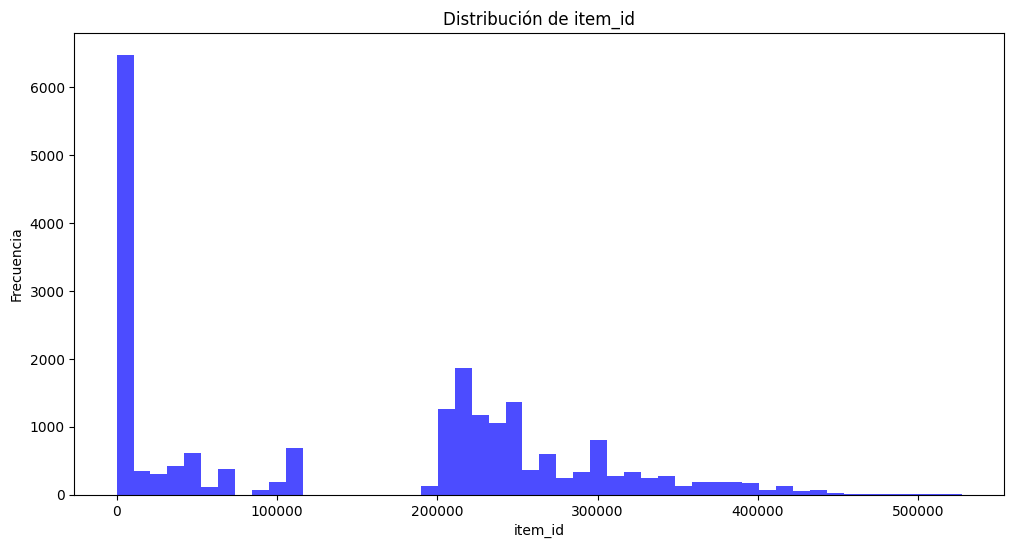

In [36]:


# Grafico la distribución de item_id
plt.figure(figsize=(12, 6))
plt.hist(df_segunda_funcion['item_id'], bins=50, color='blue', alpha=0.7)
plt.xlabel('item_id')
plt.ylabel('Frecuencia')
plt.title('Distribución de item_id')
plt.show()


In [37]:
# Obtengo el número total de item_id
numero_total_item_id = len(df_segunda_funcion['item_id'])

# Muestro el número total 
print("Número total de item_id:", numero_total_item_id)


Número total de item_id: 21194


#### Grafico la relación de items por año de lanzamiento.

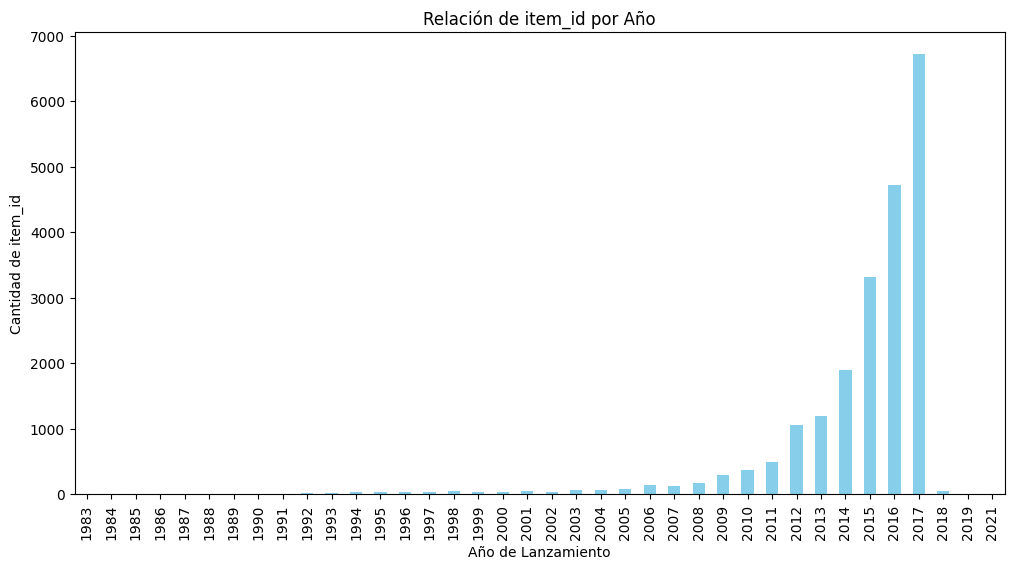

In [38]:


# Agrupo por año y cuento la cantidad de item_id
item_id_por_anio = df_segunda_funcion.groupby(df_segunda_funcion['release_date'].dt.year)['item_id'].count()

# Creo la gráfica de barras
plt.figure(figsize=(12, 6))
item_id_por_anio.plot(kind='bar', color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de item_id')
plt.title('Relación de item_id por Año')
plt.show()


### Muestro el usuario que más horas jugo por año de lanzamiento, en un dataframe.

In [39]:


# Encuentro el usuario que jugó más minutos por año de lanzamiento
usuario_max_minutos_por_anio = df_segunda_funcion.groupby(['release_date'])['playtime_forever'].idxmax()

# Creo un nuevo DataFrame con el 'user_id' de los usuarios que jugaron más minutos por año
df_usuario_max_minutos_por_anio = df_segunda_funcion.loc[usuario_max_minutos_por_anio, ['release_date', 'user_id', 'playtime_forever']]

# Organizo el nuevo DataFrame por los campos "minutos totales", "usuario" y "año"
df_usuario_max_minutos_por_anio = df_usuario_max_minutos_por_anio.sort_values(by=['playtime_forever', 'user_id', 'release_date'])

df_usuario_max_minutos_por_anio


,release_date,user_id,playtime_forever
20646,1999-11-30,03092002,0.0
21019,2007-06-22,0700464574757,0.0
20985,2004-11-05,1337Akraken,0.0
283,2009-09-19,1337lolroflmao,0.0
20587,1993-09-24,20115011,0.0
...,...,...,...
6832,2017-07-04,NiceAhTNT,184933.0
17400,2015-02-24,76561198058477289,189556.0
5169,2016-09-28,76561198045479668,243840.0
4645,2016-06-21,Wherethejewwimminat,255613.0


### Muestro el usuario que mas jugo por genero en una dataframe, con esta información puedo verificar el resultado en la función de prueba.

In [40]:


# Explode (desglosa) la columna 'genres' para que cada género esté en una fila independiente
df_desglosado = df_segunda_funcion.explode('genres')

# Encuentro el usuario que jugó más minutos por género
usuario_max_minutos_por_genero = df_desglosado.groupby(['genres'])['playtime_forever'].idxmax()

# Creo un nuevo DataFrame con el 'user_id' de los usuarios que jugaron más minutos por género
df_usuario_max_minutos_por_genero = df_desglosado.loc[usuario_max_minutos_por_genero, ['genres', 'user_id', 'playtime_forever']]

# Organizo el nuevo DataFrame por los campos "género", "usuario" y "minutos totales"
df_usuario_max_minutos_por_genero = df_usuario_max_minutos_por_genero.sort_values(by=['genres', 'user_id', 'playtime_forever'])


df_usuario_max_minutos_por_genero


,genres,user_id,playtime_forever
5169,Action,76561198045479668,243840.0
17340,Action,76561198056863351,172817.0
6832,Action,NiceAhTNT,184933.0
8436,Action,hailhitler999,144710.0
17340,Adventure,76561198056863351,172817.0
...,...,...,...
9967,Web Publishing,76561198056461397,25939.0
9967,Web Publishing,76561198056461397,25939.0
18886,Web Publishing,76561198078007369,11279.0
11678,Web Publishing,76561198094663718,5013.0


## (6). Testing función (UserForGenre).

In [41]:


def UserForGenre(genero):
    # Explode (desglosa) la columna 'genres' para que cada género esté en una fila independiente
    df_desglosado = df_segunda_funcion.explode('genres')

    # Filtro las filas que contienen el género especificado
    df_filtrado = df_desglosado[df_desglosado['genres'] == genero]

    if df_filtrado.empty:
        return {f"No se encontraron datos para el género {genero}": None}

    # Encuentro el usuario que jugó más minutos para el género
    usuario_max_minutos = df_filtrado[df_filtrado['playtime_forever'] == df_filtrado['playtime_forever'].max()]

    # Agrupo los minutos jugados por año
    minutos_por_anio = df_filtrado.groupby(df_filtrado['release_date'].dt.year)['playtime_forever'].sum()


    resultado = {
        "Usuario con más horas jugadas para Género X": usuario_max_minutos['user_id'].values[0],
        "Horas jugadas": [{"Año": año, "Minutos": horas} for año, horas in minutos_por_anio.items()]
    }

    return resultado

resultado = UserForGenre("Action")
print(resultado)


{'Usuario con más horas jugadas para Género X': '76561198045479668', 'Horas jugadas': [{'Año': 1983, 'Minutos': 1381.0}, {'Año': 1984, 'Minutos': 0.0}, {'Año': 1988, 'Minutos': 4932.0}, {'Año': 1989, 'Minutos': 4935.0}, {'Año': 1990, 'Minutos': 132.0}, {'Año': 1991, 'Minutos': 302.0}, {'Año': 1992, 'Minutos': 7284.0}, {'Año': 1993, 'Minutos': 39273.0}, {'Año': 1994, 'Minutos': 3471.0}, {'Año': 1995, 'Minutos': 33292.0}, {'Año': 1996, 'Minutos': 5567.0}, {'Año': 1997, 'Minutos': 5016.0}, {'Año': 1998, 'Minutos': 9503.0}, {'Año': 1999, 'Minutos': 20288.0}, {'Año': 2000, 'Minutos': 26230.0}, {'Año': 2001, 'Minutos': 5889.0}, {'Año': 2002, 'Minutos': 9230.0}, {'Año': 2003, 'Minutos': 93002.0}, {'Año': 2004, 'Minutos': 13971.0}, {'Año': 2005, 'Minutos': 5937.0}, {'Año': 2006, 'Minutos': 52577.0}, {'Año': 2007, 'Minutos': 149894.0}, {'Año': 2008, 'Minutos': 16763.0}, {'Año': 2009, 'Minutos': 131581.0}, {'Año': 2010, 'Minutos': 146422.0}, {'Año': 2011, 'Minutos': 38361.0}, {'Año': 2012, 'Minu

### Creo y exporto el nuevo dataframe  en .parquet solo con los campos necesarios para la función (UserForGenre), en el archivo data_segunda_funcion.parquet

In [42]:
n_df = df_segunda_funcion[['genres', 'release_date', 'playtime_forever','item_id','user_id']]

n_df.to_parquet('data_segunda_funcion.parquet', index=False)

n_df

,genres,release_date,playtime_forever,item_id,user_id
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,6.0,43110.0,76561197970982479
1,"[Action, Adventure, Casual]",2017-12-07,0.0,239030.0,js41637
2,"[Action, Adventure, Simulation]",2018-01-04,7.0,224500.0,evcentric
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0,108710.0,Riot-Punch
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0,204300.0,doctr
...,...,...,...,...,...
21189,"[Action, Adventure, Casual, Indie]",2018-01-04,269.0,8930.0,76561198060027840
21190,"[Casual, Indie, Simulation, Strategy]",2018-01-04,0.0,440.0,7Shadows
21191,"[Casual, Indie, Strategy]",2018-01-04,754.0,468410.0,76561198077307220
21192,"[Indie, Racing, Simulation]",2018-01-04,0.0,4000.0,amr_


In [43]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   playtime_forever  21194 non-null  float64       
 3   item_id           21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 828.0+ KB


## (7) Concatenación función (UsersRecommend) antes del EDA.

### Los campos que requiero para la tercera función son:
### df_steam_games:
### title: Este campo se utiliza para mostrar el nombre del juego en la salida de la función.
### user_id: para relacionar los juegos con los comentarios de los usuarios.
### df_user_review:
### item_id: Este campo se utiliza para relacionar los comentarios de los usuarios con los juegos en df_steam_games y el id del video juego.
### recommend: Para filtrar los comentarios de usuarios que sean recomendaciones positivas.
### sentiment_analysis: Para identificar comentarios neutrales o positivos.
### posted_date: permitirá identificar los juegos que recibieron recomendaciones positivas o neutrales por parte de los usuarios en un año específico, independientemente de cuándo se lanzaron.

### Concateno los campos necesarios para el desarrollo de la segunda función en un nuevo dataframe.

In [44]:
# Selecciono los campos requeridos para la función PlayTimeGenre
df_steam_games_subset = df_steam_games[['title', ]]
df_user_reviews_subset = df_user_reviews[['item_id', 'recommend', 'posted_date', 'sentiment_analysis']]
df_users_items_subset = df_users_items[[ 'user_id']]

# Concateno los DataFrames seleccionados
tercera_funcion = pd.concat([df_steam_games_subset, df_user_reviews_subset, df_users_items_subset], axis=1)

tercera_funcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21194 non-null  object        
 1   item_id             25771 non-null  float64       
 2   recommend           25771 non-null  object        
 3   posted_date         25771 non-null  datetime64[ns]
 4   sentiment_analysis  25771 non-null  float64       
 5   user_id             88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.0+ MB


### Elimino datos faltantes producto de las diferentes longitudes en la concatenación

In [45]:
tercera_funcion.dropna(inplace=True)
tercera_funcion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21194 non-null  object        
 1   item_id             21194 non-null  float64       
 2   recommend           21194 non-null  object        
 3   posted_date         21194 non-null  datetime64[ns]
 4   sentiment_analysis  21194 non-null  float64       
 5   user_id             21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.1+ MB


### Reorganizo los indices despues de eliminar los datos faltantes

In [46]:
# Reorganizo los indices despues de la eliminación de datos faltantes
tercera_funcion.reset_index(drop=True, inplace=True)
print(tercera_funcion.index)

RangeIndex(start=0, stop=21194, step=1)


In [47]:
tercera_funcion.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


In [48]:
tercera_funcion.tail()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
21189,Kebab it Up!,8930.0,True,2014-01-01,0.0,76561198060027840
21190,Colony On Mars,440.0,True,2015-01-01,2.0,7Shadows
21191,LOGistICAL: South Africa,468410.0,True,2014-01-01,2.0,76561198077307220
21192,Russian Roads,4000.0,False,2015-01-01,0.0,amr_
21193,EXIT 2 - Directions,730.0,True,2014-01-01,2.0,amstelebomdemais


### Transformo el campo recommend de categorico a tipo de dato boleano para realizar las consultas.

In [49]:
# Transformo la columna "recommend" a tipo booleano
tercera_funcion['recommend'] = tercera_funcion['recommend'].astype(bool)


### Verifico la transformación del campo recommend, revisando nuevamente las caracterisricas.

In [50]:
tercera_funcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21194 non-null  object        
 1   item_id             21194 non-null  float64       
 2   recommend           21194 non-null  bool          
 3   posted_date         21194 non-null  datetime64[ns]
 4   sentiment_analysis  21194 non-null  float64       
 5   user_id             21194 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 848.7+ KB


## (8). EDA para el desarrollo de la función  (UsersRecommend)

### Reviso la distribución de los datos del campo recommend con un gráfico de barras.

/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


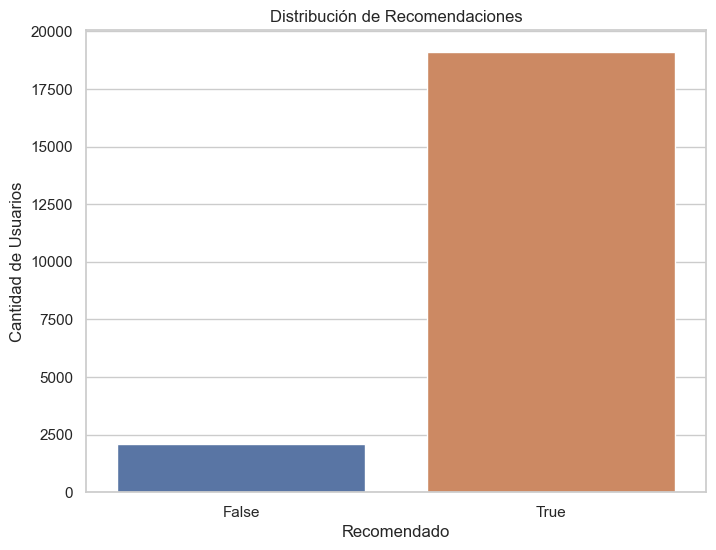

In [51]:
# Creo un gráfico de barras para la distribución de "recommend"
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=tercera_funcion, x='recommend')
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Usuarios')


plt.show()

## Se observa mayores recomendaciones positivas en la grafica de distribución.

### Reviso la distribución de recomendaciones por año 

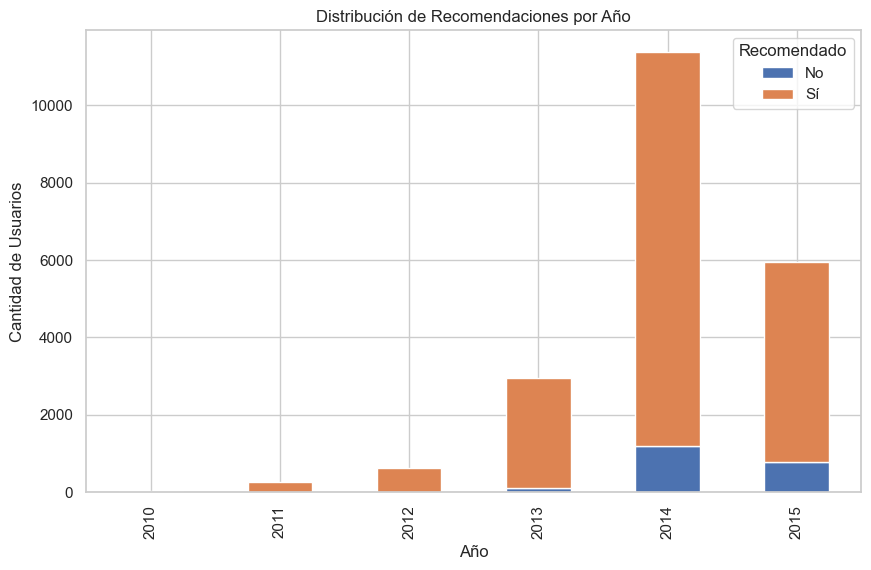

In [52]:


# Agrupo los datos por año y cuento la cantidad de recomendaciones positivas y negativas
recommend_by_year = tercera_funcion.groupby(tercera_funcion['posted_date'].dt.year)['recommend'].value_counts().unstack().fillna(0)

# Creo un gráfico de barras apiladas
ax = recommend_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Recomendaciones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Usuarios')
plt.legend(title='Recomendado', labels=['No', 'Sí'], loc='upper right')

plt.show()


## Se observa que los comentarios o posteos van del año 2010 al 2015.
### predominan los comentarios positivos del los usuarios en cuanto a los juegos.


### Reviso el titulo con mas recomendaciones por año en un grafico de barras apiladas.

/var/folders/yv/1ws10z49371b32qc3rr7q96r0000gn/T/ipykernel_655/1153562599.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_titles_by_year))
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28856 (\N{CJK UNIFIED IDEOGRAPH-70B8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missin

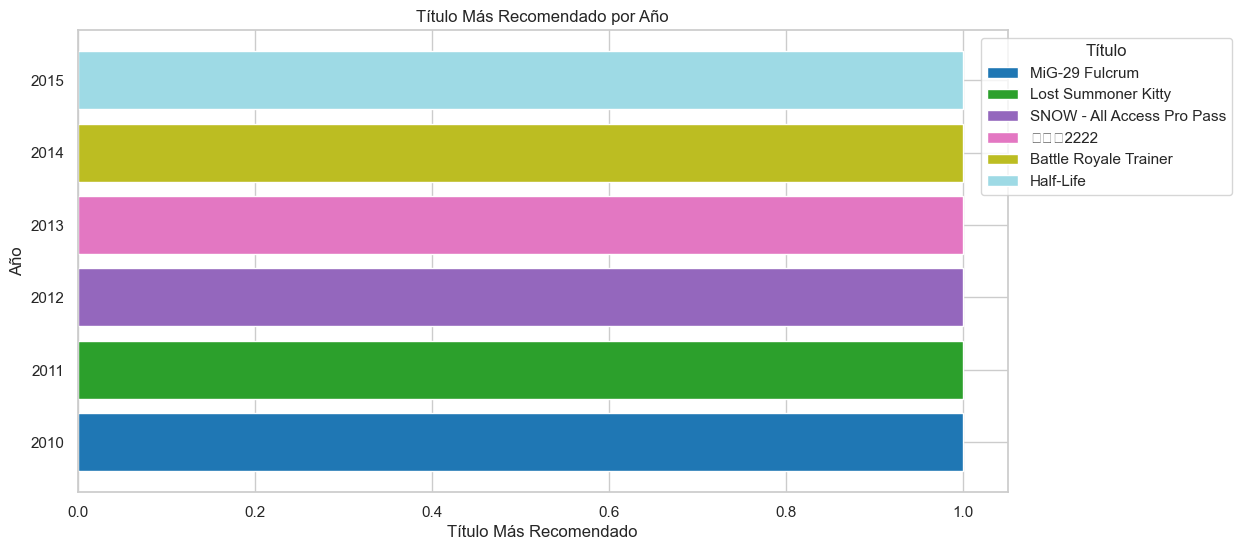

In [53]:


# Encuentro el título más recomendado por año
max_recommendations = tercera_funcion.groupby(tercera_funcion['posted_date'].dt.year)['recommend'].idxmax()
top_titles_by_year = tercera_funcion.loc[max_recommendations, ['posted_date', 'title']]

# Creo un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.get_cmap('tab20', len(top_titles_by_year))
top_titles_by_year['year'] = top_titles_by_year['posted_date'].dt.year
top_titles_by_year.sort_values('year', ascending=False, inplace=True)

for i, (year, group) in enumerate(top_titles_by_year.groupby('year')):
    ax.barh(group['year'], 1, color=colors(i), label=group['title'].values[0])

plt.yticks(top_titles_by_year['year'], labels=top_titles_by_year['year'])
plt.xlabel('Título Más Recomendado')
plt.ylabel('Año')
plt.legend(title='Título', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Título Más Recomendado por Año')
plt.show()







### Reviso la distribución de los datos del campo  sentiment_analysis.

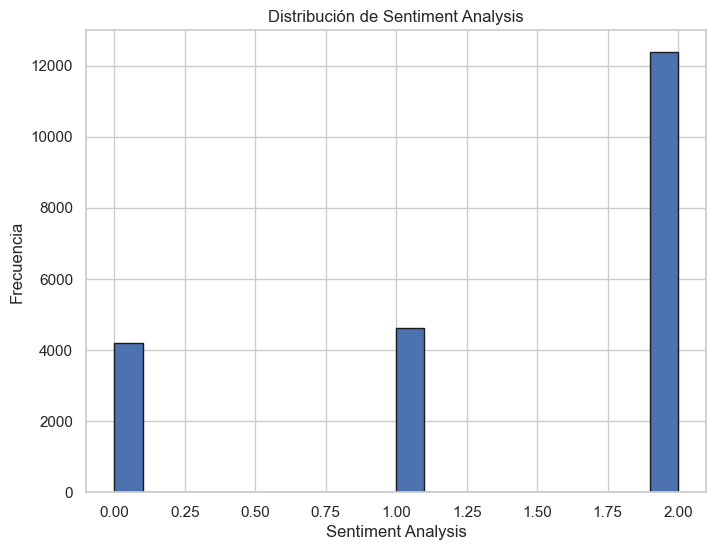

In [54]:
# Creo un histograma de la distribución de sentiment_analysis
plt.figure(figsize=(8, 6))
plt.hist(tercera_funcion['sentiment_analysis'], bins=20, edgecolor='k')
plt.title('Distribución de Sentiment Analysis')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Frecuencia')
plt.grid(True)


plt.show()

### Realizo una tabla con el un conteo total del analisis de sentimiento.

In [55]:


# Defino las categorías y sus etiquetas
categorias = {0: 'Malo', 1: 'Neutral', 2: 'Bueno'}

# Calculo el conteo de cada categoría en la columna sentiment_analysis
conteo_sentimiento = tercera_funcion['sentiment_analysis'].map(categorias).value_counts().reset_index()

# Renombro las columnas
conteo_sentimiento.columns = ['Sentimiento', 'Conteo']

# Muestro la tabla de conteo
conteo_sentimiento


,Sentimiento,Conteo
0,Bueno,12376
1,Neutral,4615
2,Malo,4203


In [56]:
tercera_funcion.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


## (9). Testing función (UsersRecommend)

In [112]:


def UsersRecommend(año):
    # Filtro los juegos recomendados y con comentarios positivos/neutrales para el año especificado
    filtered_df = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['sentiment_analysis'] >= 0) & (tercera_funcion['posted_date'].dt.year == año)]
    
    # Agrupo por título, cuento las recomendaciones y ordeno en orden descendente
    recommended_by_title = filtered_df.groupby('title')['recommend'].sum().reset_index()
    recommended_by_title = recommended_by_title.sort_values(by='recommend', ascending=False)
    
    # Selecciono los 3 juegos más recomendados
    top3_games = recommended_by_title.head(3)
    
    # Creo una lista de diccionarios con el formato especificado
    result = [{"Puesto 1": top3_games.iloc[0]['title']},
              {"Puesto 2": top3_games.iloc[1]['title']},
              {"Puesto 3": top3_games.iloc[2]['title']}]
    
    return result


year = 2011
top_games_2022 = UsersRecommend(year)
print(top_games_2022)


[{'Puesto 1': '100% Orange Juice'}, {'Puesto 2': '100% Orange Juice - Starter Character Voice Pack'}, {'Puesto 3': 'RIDE - 2015 Top Bikes Pack 1'}]


### Creo la grafica de barras para corroborar el resultado de la función de los tres juegos con mas recomendaciones para los años:
### 2010, 2011, 2012, 2013, 2014, 2015.

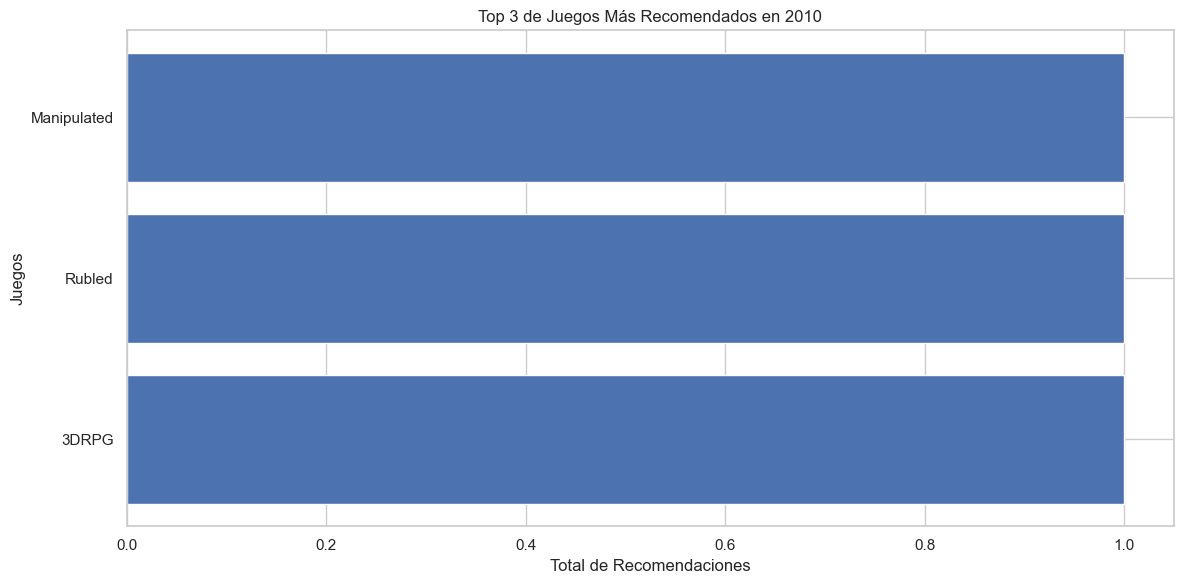

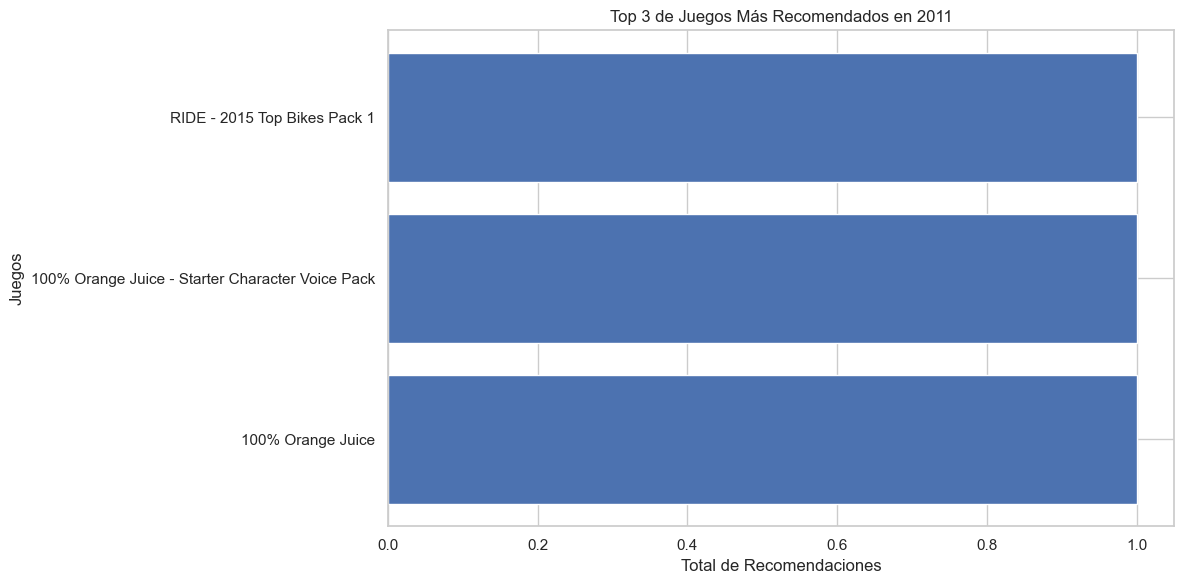

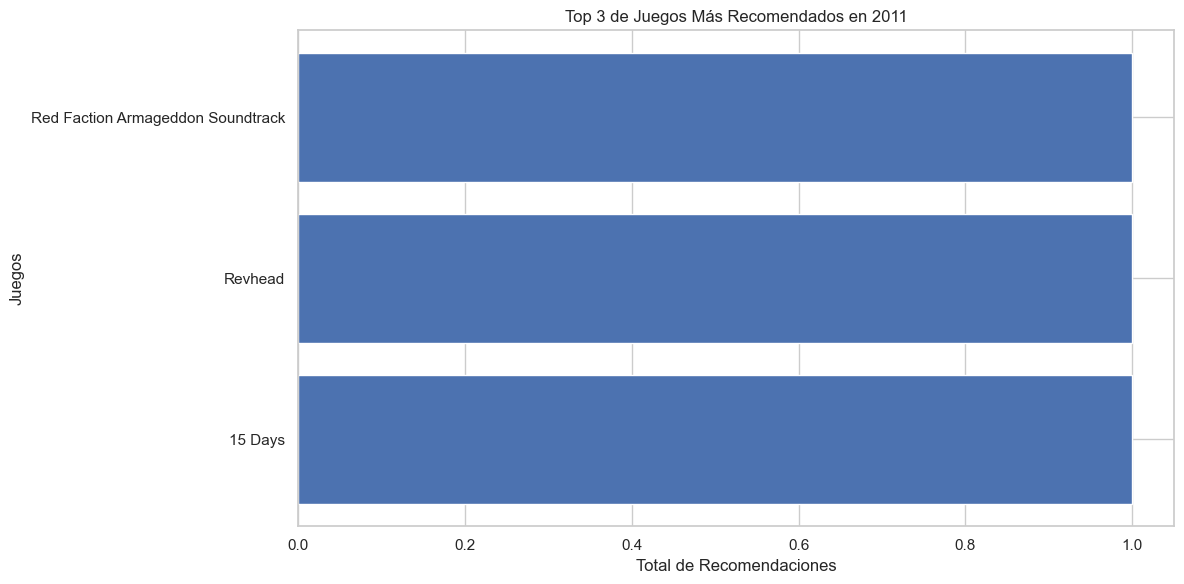

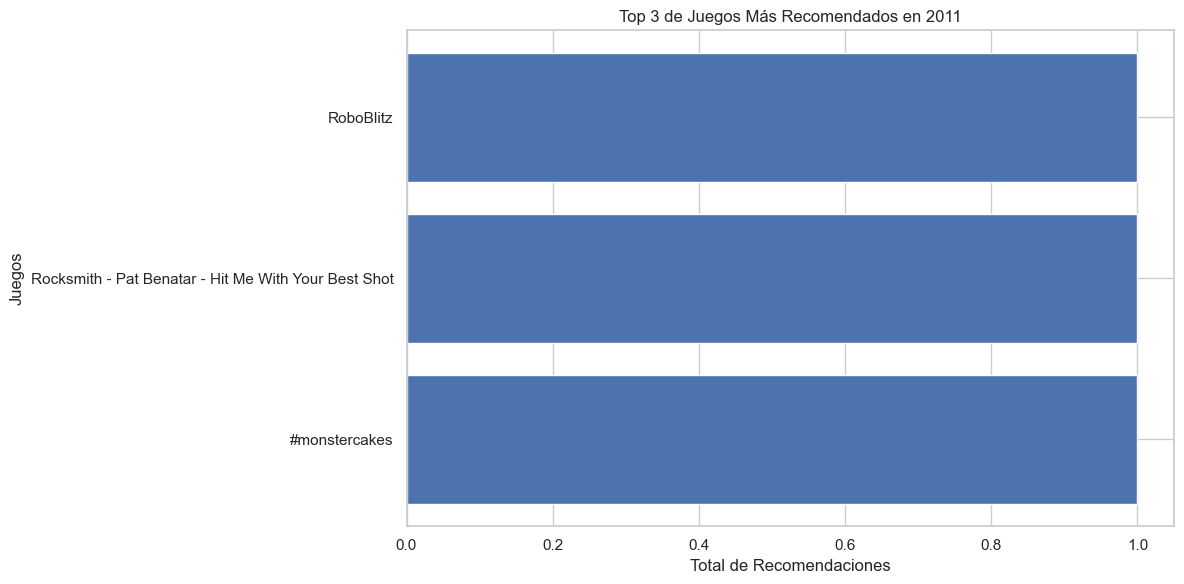

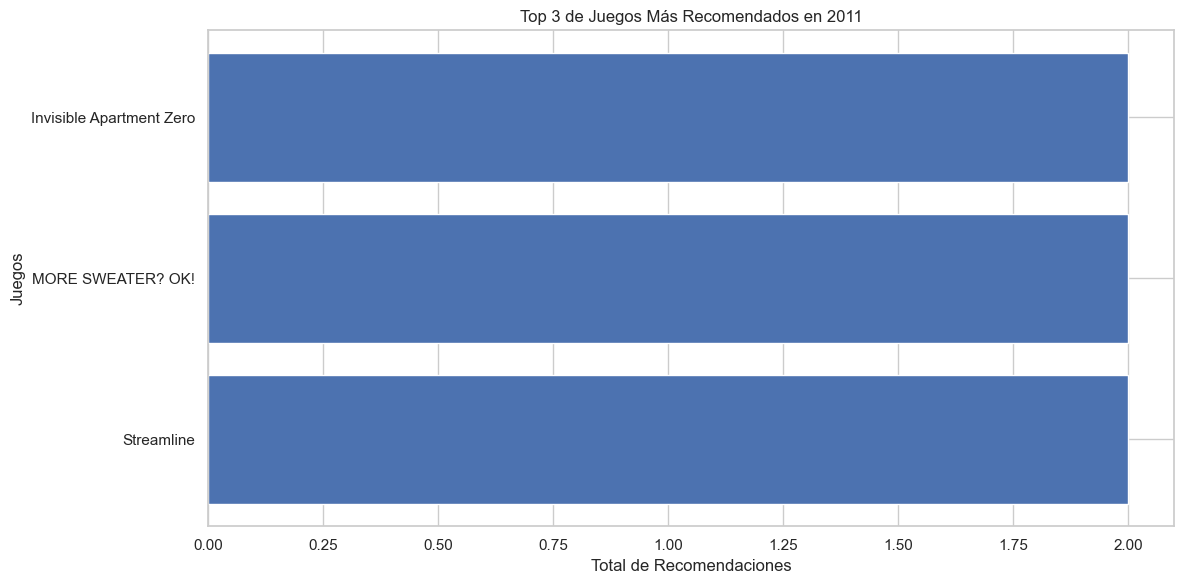

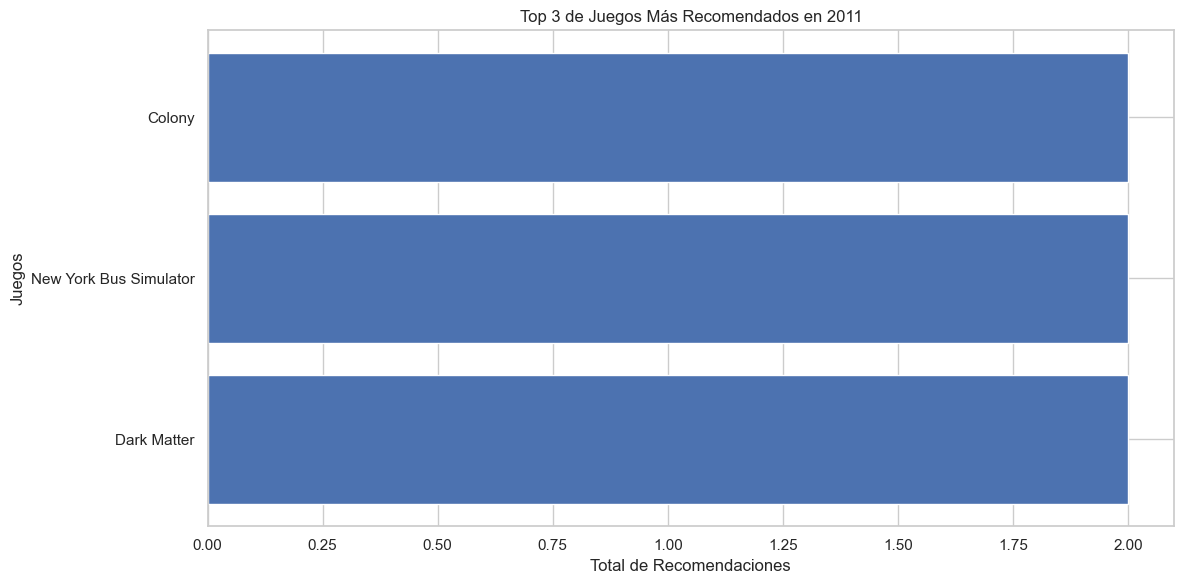

In [58]:


# Año 2010
filtered_df_2010 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2010)]
recommended_by_title_2010 = filtered_df_2010.groupby('title')['recommend'].sum().reset_index()
top3_games_2010 = recommended_by_title_2010.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2010
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2010['title'], top3_games_2010['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2010')
plt.tight_layout()
plt.show()

# Año 2011
filtered_df_2011 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2011)]
recommended_by_title_2011 = filtered_df_2011.groupby('title')['recommend'].sum().reset_index()
top3_games_2011 = recommended_by_title_2011.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2011
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2011['title'], top3_games_2011['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2011')
plt.tight_layout()
plt.show()


# año 2012
filtered_df_2011 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2012)]
recommended_by_title_2011 = filtered_df_2011.groupby('title')['recommend'].sum().reset_index()
top3_games_2011 = recommended_by_title_2011.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2012
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2011['title'], top3_games_2011['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2011')
plt.tight_layout()
plt.show()

# Año 2013
filtered_df_2011 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2013)]
recommended_by_title_2011 = filtered_df_2011.groupby('title')['recommend'].sum().reset_index()
top3_games_2011 = recommended_by_title_2011.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2013
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2011['title'], top3_games_2011['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2011')
plt.tight_layout()
plt.show()


# Año 2014
filtered_df_2011 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2014)]
recommended_by_title_2011 = filtered_df_2011.groupby('title')['recommend'].sum().reset_index()
top3_games_2011 = recommended_by_title_2011.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2014
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2011['title'], top3_games_2011['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2011')
plt.tight_layout()
plt.show()


# Año 2015
filtered_df_2011 = tercera_funcion[(tercera_funcion['recommend'] == True) & (tercera_funcion['posted_date'].dt.year == 2015)]
recommended_by_title_2011 = filtered_df_2011.groupby('title')['recommend'].sum().reset_index()
top3_games_2011 = recommended_by_title_2011.sort_values(by='recommend', ascending=False).head(3)

# Creo gráfica para 2015
plt.figure(figsize=(12, 6))
plt.barh(top3_games_2011['title'], top3_games_2011['recommend'])
plt.xlabel('Total de Recomendaciones')
plt.ylabel('Juegos')
plt.title('Top 3 de Juegos Más Recomendados en 2011')
plt.tight_layout()
plt.show()

### Creo y exporto los campos necesarios para la función los cuales son : recommend, title, sentiment_analysis, posted_date. el un archivo.parquet data_tercera_funcion.

In [118]:
df_tercera = tercera_funcion[['recommend', 'title', 'sentiment_analysis','posted_date','item_id','user_id']]

df_tercera.to_parquet('data_terceraCuarta_funcion.parquet', index=False)

df_tercera

,recommend,title,sentiment_analysis,posted_date,item_id,user_id
0,True,Lost Summoner Kitty,2.0,2011-01-01,43110.0,76561197970982479
1,True,弹炸人2222,0.0,2013-01-01,239030.0,js41637
2,True,Battle Royale Trainer,2.0,2014-01-01,224500.0,evcentric
3,True,SNOW - All Access Pro Pass,2.0,2012-01-01,108710.0,Riot-Punch
4,True,SNOW - All Access Legend Pass,2.0,2013-01-01,204300.0,doctr
...,...,...,...,...,...,...
21189,True,Kebab it Up!,0.0,2014-01-01,8930.0,76561198060027840
21190,True,Colony On Mars,2.0,2015-01-01,440.0,7Shadows
21191,True,LOGistICAL: South Africa,2.0,2014-01-01,468410.0,76561198077307220
21192,False,Russian Roads,0.0,2015-01-01,4000.0,amr_


In [94]:
df_tercera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   recommend           21194 non-null  bool          
 1   title               21194 non-null  object        
 2   sentiment_analysis  21194 non-null  float64       
 3   posted_date         21194 non-null  datetime64[ns]
 4   item_id             21194 non-null  float64       
 5   user_id             21194 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 848.7+ KB


 # (10) Concatenación función (UsersNotRecommend.)
 ### Para esta funcióm se utilizan los mismos campos de la función  (UsersRecommend). 
 #### los cuales son : recommend, title, sentiment_analysis, posted_date, item_id, user_id

### Trabajare con el DataFrame df_tercera que contiene los campos mencionados.


In [97]:
df_tercera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   recommend           21194 non-null  bool          
 1   title               21194 non-null  object        
 2   sentiment_analysis  21194 non-null  float64       
 3   posted_date         21194 non-null  datetime64[ns]
 4   item_id             21194 non-null  float64       
 5   user_id             21194 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 848.7+ KB


 ## (11) .EDA para la función (UsersNotRecommend.)
 ### Aplica el mismo EDA de la función (UsersRecommend). Solo mostrare con una grafica de barras los juegos menos recomendados por año, para comparar el resultado con el testing de la función,(UsersNotRecommend.)

### Creo la grafica de barras para corroborar el resultado de la función de los tres juegos menos recomendados para los años:
### 2010, 2011, 2012, 2013, 2014, 2015.

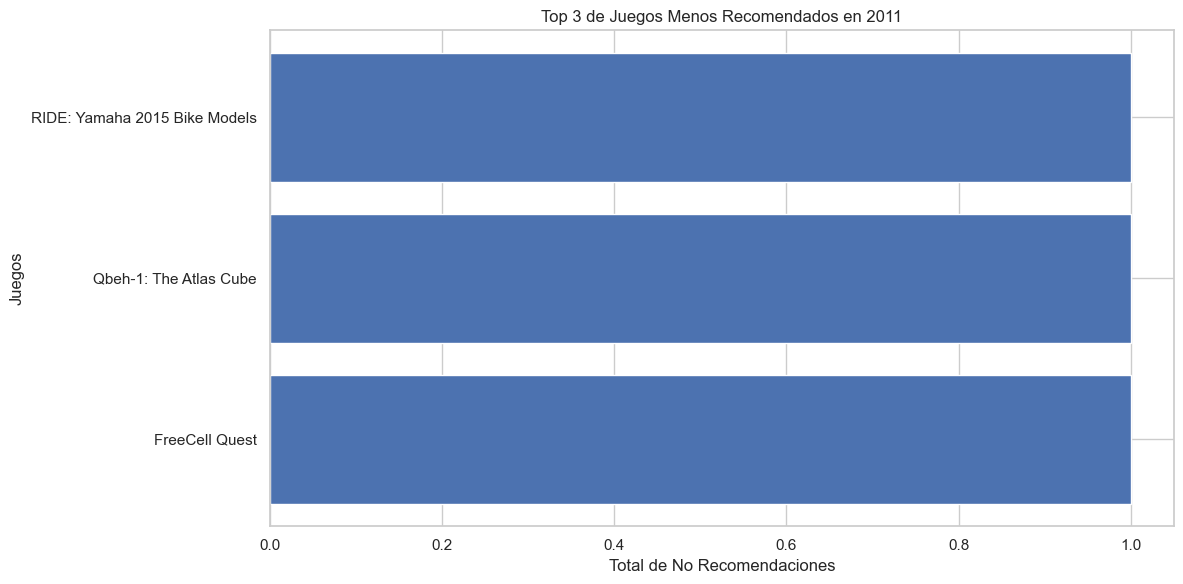

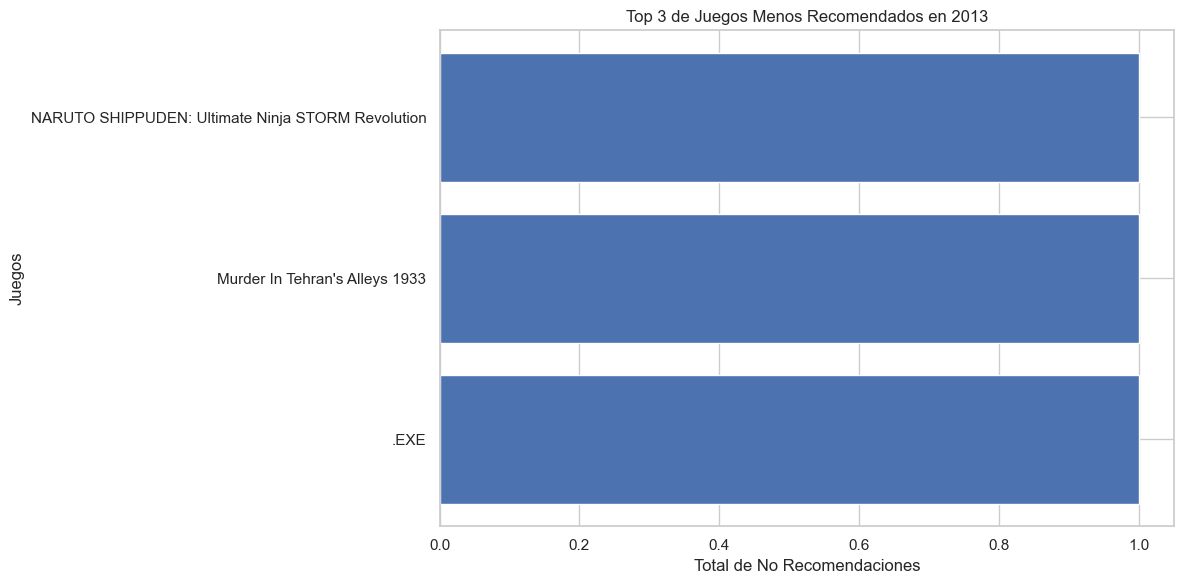

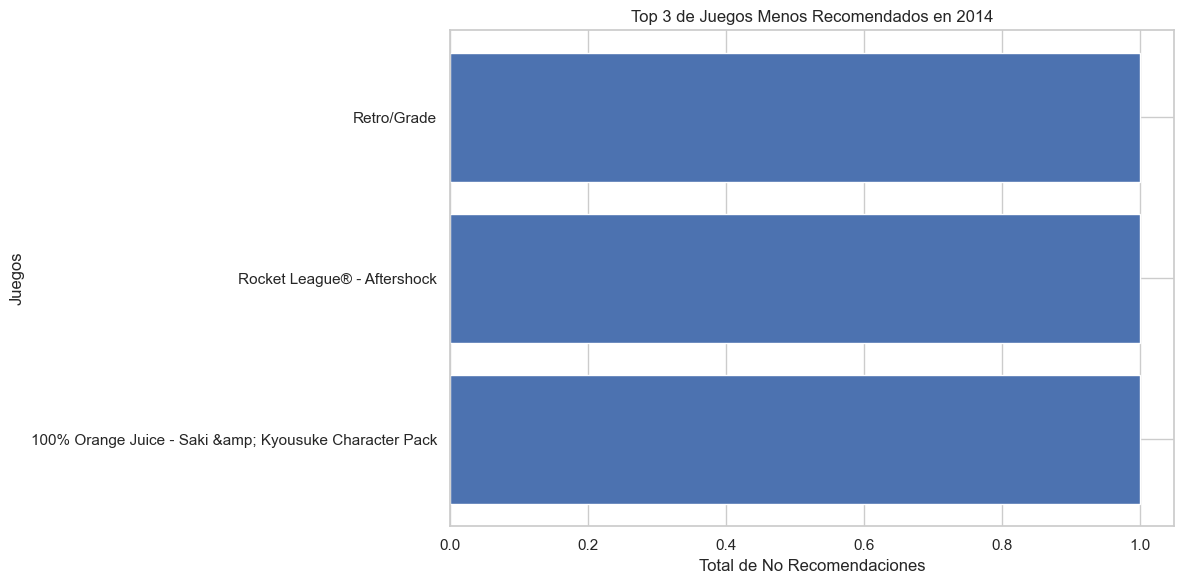

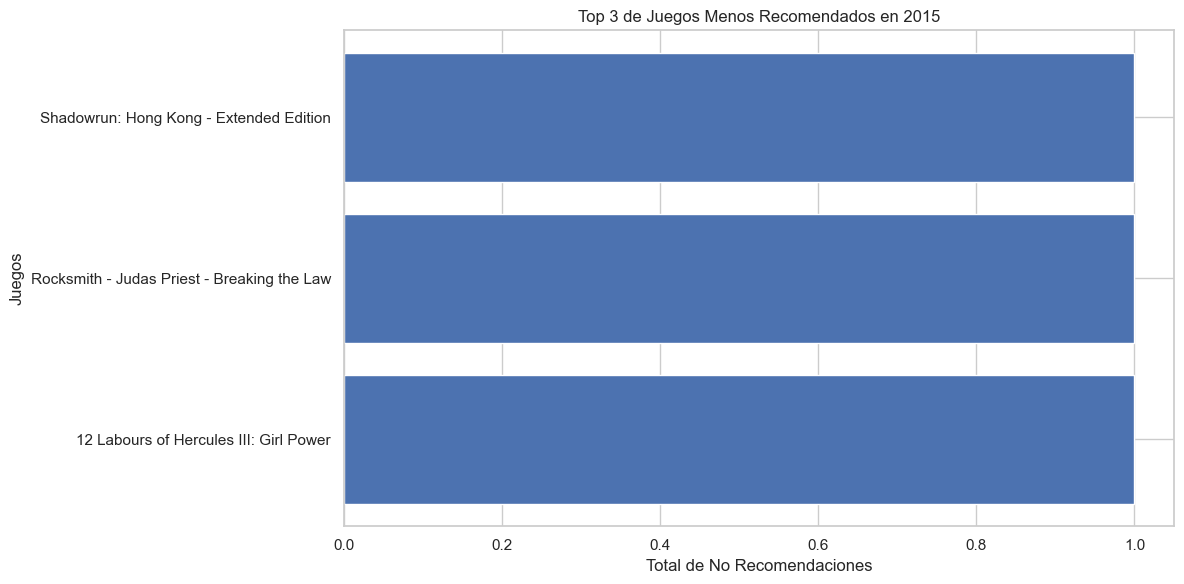

In [114]:
import matplotlib.pyplot as plt

def plotBottomGamesByYear(df, start_year, end_year):
    for año in range(start_year, end_year + 1):
        filtered_df = df[(df['recommend'] == False) & (df['sentiment_analysis'] == 0) & (df['posted_date'].dt.year == año)]
        not_recommended_by_title = filtered_df.groupby('title')['recommend'].count().reset_index()
        not_recommended_by_title = not_recommended_by_title.sort_values(by='recommend', ascending=False)

        if len(not_recommended_by_title) < 3:
            continue

        top3_games = not_recommended_by_title.head(3)

        plt.figure(figsize=(12, 6))
        plt.barh(top3_games['title'], top3_games['recommend'])
        plt.xlabel('Total de No Recomendaciones')
        plt.ylabel('Juegos')
        plt.title(f'Top 3 de Juegos Menos Recomendados en {año}')
        plt.tight_layout()
        plt.show()


start_year = 2010
end_year = 2015


plotBottomGamesByYear(tercera_funcion, start_year, end_year)


## (12). Testing función (UsersNotRecommend)

In [117]:
def UsersNotRecommend(año):
    # Filtro los juegos no recomendados y con comentarios negativos para el año especificado
    filtered_df = df_tercera[(df_tercera['recommend'] == False) & (df_tercera['sentiment_analysis'] == 0) & (df_tercera['posted_date'].dt.year == año)]
    
    # Agrupo por título, cuento las no recomendaciones y ordeno en orden descendente
    not_recommended_by_title = filtered_df.groupby('title')['recommend'].count().reset_index()
    not_recommended_by_title = not_recommended_by_title.sort_values(by='recommend', ascending=False)
    
    # Selecciono los 3 juegos menos recomendados
    bottom3_games = not_recommended_by_title.head(3)
    
    # Creo una lista de diccionarios con el formato especificado
    result = [{"Puesto 1": bottom3_games.iloc[0]['title']},
              {"Puesto 2": bottom3_games.iloc[1]['title']},
              {"Puesto 3": bottom3_games.iloc[2]['title']}]
    
    return result

year = 2013
bottom_games_2022 = UsersNotRecommend(year)
print(bottom_games_2022)

[{'Puesto 1': '.EXE'}, {'Puesto 2': "Murder In Tehran's Alleys 1933"}, {'Puesto 3': 'NARUTO SHIPPUDEN: Ultimate Ninja STORM Revolution'}]


##  (13).Concatenación función (sentiment_analysis.)
### Concateno los siguientes campos para el desarrollo de la función sentiment_analysis
### release_date, item_id, recommend, sentiment_analysis, user_id.

In [120]:
# Selecciono los campos requeridos para la función sentiment_analysis.
df_steam_games_subset = df_steam_games[['release_date', ]]
df_user_reviews_subset = df_user_reviews[['item_id', 'recommend',  'sentiment_analysis']]
df_users_items_subset = df_users_items[[ 'user_id']]

# Concateno los DataFrames seleccionados
quinta_funcion = pd.concat([df_steam_games_subset, df_user_reviews_subset, df_users_items_subset], axis=1)

quinta_funcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             25771 non-null  float64       
 2   recommend           25771 non-null  object        
 3   sentiment_analysis  25771 non-null  float64       
 4   user_id             88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.4+ MB


### Elimino datos faltantes producto de las diferentes longitudes en la concatenación

In [121]:
quinta_funcion.dropna(inplace=True)
quinta_funcion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             21194 non-null  float64       
 2   recommend           21194 non-null  object        
 3   sentiment_analysis  21194 non-null  float64       
 4   user_id             21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 993.5+ KB


In [122]:
# Reorganizo los indices despues de la eliminación de datos faltantes
quinta_funcion.reset_index(drop=True, inplace=True)
print(quinta_funcion.index)

RangeIndex(start=0, stop=21194, step=1)


In [123]:
quinta_funcion.head()

,release_date,item_id,recommend,sentiment_analysis,user_id
0,2018-01-04,43110.0,True,2.0,76561197970982479
1,2017-12-07,239030.0,True,0.0,js41637
2,2018-01-04,224500.0,True,2.0,evcentric
3,2018-01-04,108710.0,True,2.0,Riot-Punch
4,2018-01-04,204300.0,True,2.0,doctr


In [124]:
quinta_funcion.tail()

,release_date,item_id,recommend,sentiment_analysis,user_id
21189,2018-01-04,8930.0,True,0.0,76561198060027840
21190,2018-01-04,440.0,True,2.0,7Shadows
21191,2018-01-04,468410.0,True,2.0,76561198077307220
21192,2018-01-04,4000.0,False,0.0,amr_
21193,2017-09-02,730.0,True,2.0,amstelebomdemais


In [125]:
quinta_funcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             21194 non-null  float64       
 2   recommend           21194 non-null  object        
 3   sentiment_analysis  21194 non-null  float64       
 4   user_id             21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 828.0+ KB


## (14) EDA (sentiment_analysis.)

### Calculo el promedio del análisis de sentimiento para cada año de lanzamiento  a través de un gráfico de línea. Esto permitirá visualizar cómo cambia el análisis de sentimiento a lo largo de los años.

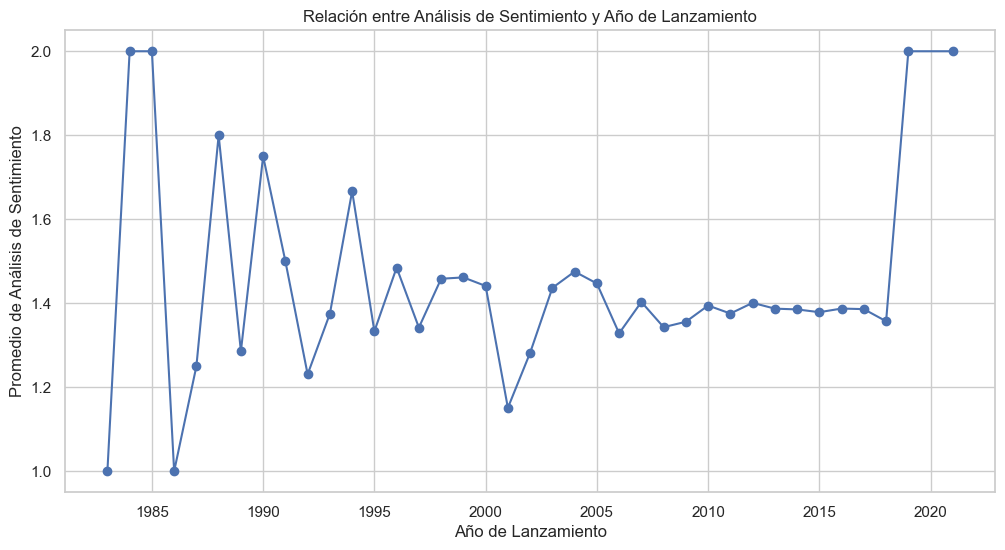

In [128]:


# Calculo el promedio del análisis de sentimiento por año
sentiment_by_year = quinta_funcion.groupby(quinta_funcion['release_date'].dt.year)['sentiment_analysis'].mean()

# Creo un gráfico de línea para mostrar la relación
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_year.index, sentiment_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Relación entre Análisis de Sentimiento y Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Promedio de Análisis de Sentimiento')
plt.grid(True)
plt.show()


### Genero una tabla de pandas con el analisis de sentimiento total por año de lanzamiento.

In [130]:



sentiment_by_year = quinta_funcion.groupby(quinta_funcion['release_date'].dt.year)['sentiment_analysis'].count()

sentiment_by_year_df = pd.DataFrame(sentiment_by_year)
sentiment_by_year_df.reset_index(inplace=True)
sentiment_by_year_df.columns = ['Año de Lanzamiento', 'Total de Sentimiento']

sentiment_by_year_df


,Año de Lanzamiento,Total de Sentimiento
0,1983,1
1,1984,2
2,1985,1
3,1986,1
4,1987,4
5,1988,5
6,1989,7
7,1990,8
8,1991,10
9,1992,13


### Muestro una grafica con la distribución por año de lanzamiento de sentimientos negativos.


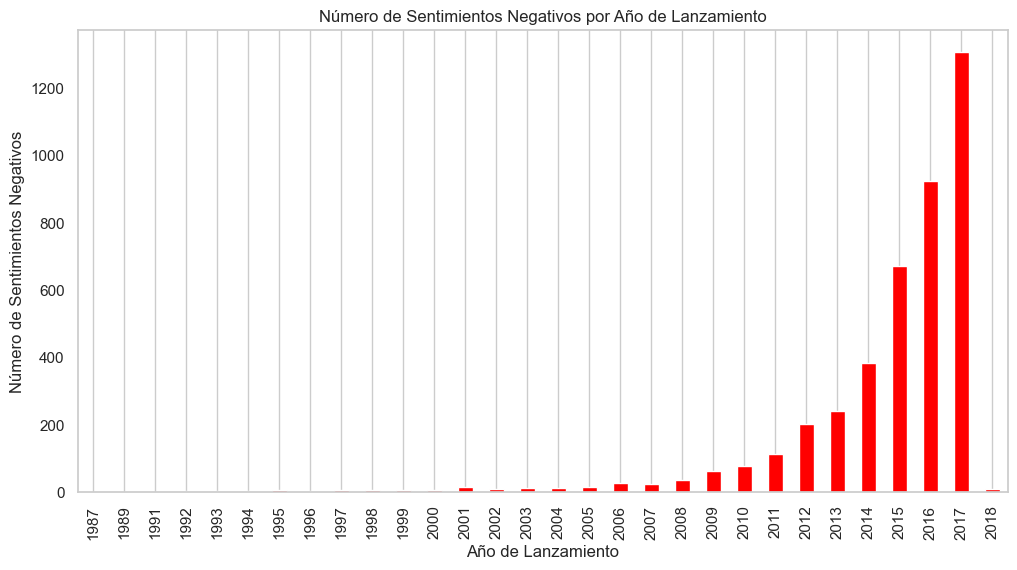

In [132]:


# Filtro las filas con sentimiento negativo (valor 0)
negativos = quinta_funcion[quinta_funcion['sentiment_analysis'] == 0]

# Calculo el número de sentimientos negativos por año
negativos_por_año = negativos.groupby(negativos['release_date'].dt.year).size()

# Creo la gráfica de barras
plt.figure(figsize=(12, 6))
negativos_por_año.plot(kind='bar', color='red')
plt.title('Número de Sentimientos Negativos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Sentimientos Negativos')
plt.grid(axis='y')
plt.show()


### Genero una tabla de pandas con el analisis de sentimiento  negativo por año de lanzamiento.

In [140]:


# Filtro las filas con sentimiento negativo (valor 0)
negativos = quinta_funcion[quinta_funcion['sentiment_analysis'] == 0]

# Calculo
# el número total de sentimientos negativos por año
negativos_por_año = negativos.groupby(negativos['release_date'].dt.year).size().reset_index()
negativos_por_año.columns = ['Año de Lanzamiento', 'Total de Sentimientos Negativos']


negativos_por_año


,Año de Lanzamiento,Total de Sentimientos Negativos
0,1987,1
1,1989,2
2,1991,1
3,1992,4
4,1993,4
5,1994,3
6,1995,7
7,1996,4
8,1997,8
9,1998,7


### Muestro una grafica con la distribución por año de lanzamiento de sentimientos neutros.

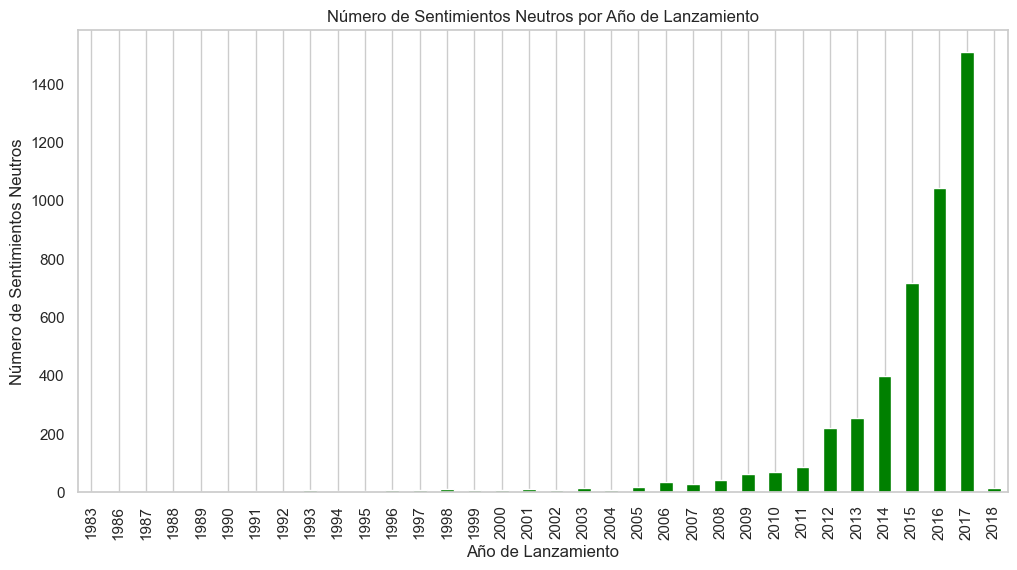

In [136]:

neutros = quinta_funcion[quinta_funcion['sentiment_analysis'] == 1]

neutros_por_año = neutros.groupby(neutros['release_date'].dt.year).size()

plt.figure(figsize=(12, 6))
neutros_por_año.plot(kind='bar', color='green')
plt.title('Número de Sentimientos Neutros por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Sentimientos Neutros')
plt.grid(axis='y')
plt.show()


### Genero una tabla de pandas con el analisis de sentimiento  negativo por año de lanzamiento.

In [139]:

neutros = quinta_funcion[quinta_funcion['sentiment_analysis'] == 1]

neutros_por_año = neutros.groupby(neutros['release_date'].dt.year).size().reset_index()
neutros_por_año.columns = ['Año de Lanzamiento', 'Total de Sentimientos Neutros']

neutros_por_año


,Año de Lanzamiento,Total de Sentimientos Neutros
0,1983,1
1,1986,1
2,1987,1
3,1988,1
4,1989,1
5,1990,2
6,1991,3
7,1992,2
8,1993,7
9,1994,4


### Muestro una grafica con la distribución por año de lanzamiento de sentimientos positivos.

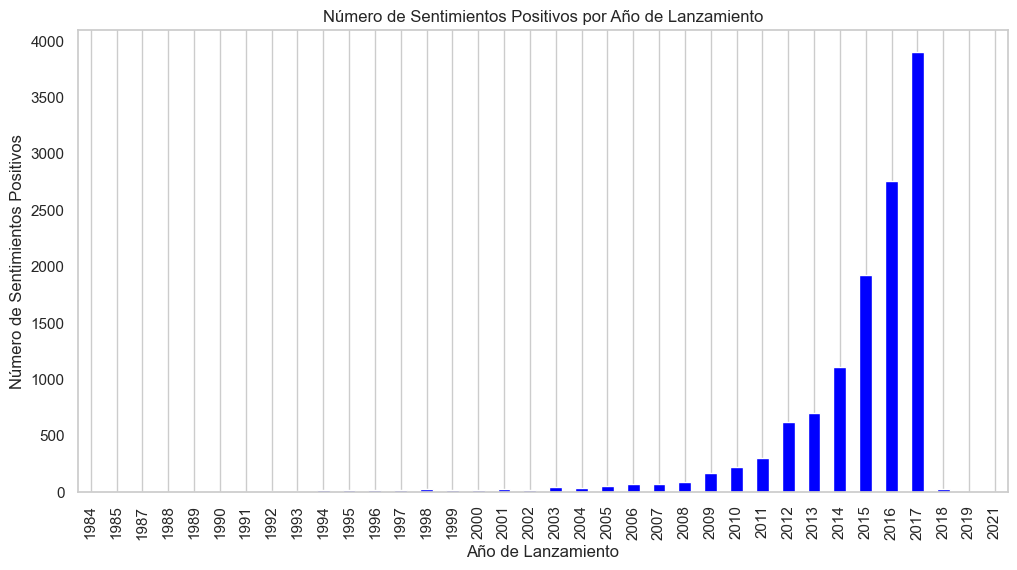

In [143]:


positivos = quinta_funcion[quinta_funcion['sentiment_analysis'] == 2]

positivos_por_año = positivos.groupby(positivos['release_date'].dt.year).size()


plt.figure(figsize=(12, 6))
positivos_por_año.plot(kind='bar', color='blue')
plt.title('Número de Sentimientos Positivos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Sentimientos Positivos')
plt.grid(axis='y')
plt.show()


### Genero una tabla de pandas con el analisis de sentimiento positivo por año de lanzamiento.

In [153]:

positivos = quinta_funcion[quinta_funcion['sentiment_analysis'] == 2]

positivos_por_año = positivos.groupby(positivos['release_date'].dt.year).size().reset_index()
positivos_por_año.columns = ['Año de Lanzamiento', 'Total de Sentimientos Positivos']


positivos_por_año


,Año de Lanzamiento,Total de Sentimientos Positivos
0,1984,2
1,1985,1
2,1987,2
3,1988,4
4,1989,4
5,1990,6
6,1991,6
7,1992,7
8,1993,13
9,1994,23


  ## (15)  Testing función (sentiment_analysis.)

In [160]:
def sentiment_analysis(año):
    # Filtro el DataFrame por el año de lanzamiento
    filtrado_por_año = quinta_funcion[quinta_funcion['release_date'].dt.year == año]

    # Calculo el número de registros para cada categoría de análisis de sentimiento
    total_negativos = len(filtrado_por_año[filtrado_por_año['sentiment_analysis'] == 0])
    total_neutros = len(filtrado_por_año[filtrado_por_año['sentiment_analysis'] == 1])
    total_positivos = len(filtrado_por_año[filtrado_por_año['sentiment_analysis'] == 2])

    # Creo un diccionario con los resultados
    resultado = {'Negative': total_negativos, 'Neutral': total_neutros, 'Positive': total_positivos}

    return resultado
año_de_interes = 2017
resultados = sentiment_analysis(año_de_interes)
print(resultados)



{'Negative': 1307, 'Neutral': 1509, 'Positive': 3899}


### Exporto la data necesaria para la quinta función en un archivo .parquet.

In [166]:
# Cargo la  data desde el archivo Parquet

# Especifica la ubicación y el nombre del archivo Parquet donde deseas guardar los datos.
archivo_parquet = "datosquinta_funcion.parquet"

# Utiliza el método to_parquet para guardar el DataFrame en un archivo Parquet.
quinta_funcion.to_parquet(archivo_parquet, index=False)
